In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

df = pd.read_csv('rabies_dataset.csv')

In [34]:
df.head()

,dog_breed,dog_age,vaccinated,grooming,rabies,fever,lethargy,behavior_change,aggression,excessive_drooling,difficulty_swallowing,seizures,staggering_gait,hind_leg_paralysis,jaw_dropped
0,Shih Tzu,9,no,no,no,no,no,no,no,no,no,no,no,no,no
1,Pomeranian,10,yes,yes,no,no,no,no,no,no,no,no,no,no,no
2,Australian Shepherd,10,yes,yes,no,no,no,no,no,no,no,no,no,no,no
3,Shih Tzu,6,yes,yes,no,no,no,no,no,no,no,no,no,no,no
4,Great Dane,10,yes,yes,no,no,no,no,no,no,no,no,no,no,no


In [35]:
print(df.isnull().sum())

dog_breed                0
dog_age                  0
vaccinated               0
grooming                 0
rabies                   0
fever                    0
lethargy                 0
behavior_change          0
aggression               0
excessive_drooling       0
difficulty_swallowing    0
seizures                 0
staggering_gait          0
hind_leg_paralysis       0
jaw_dropped              0
dtype: int64


In [36]:
# Count the total number of duplicate rows
num_duplicates = df.duplicated().sum()

print(f"Found {num_duplicates} duplicate rows in the dataset.")

Found 1814 duplicate rows in the dataset.


In [37]:
df = df.drop_duplicates()

In [38]:
# Count the total number of duplicate rows after dropping duplicates
num_duplicates = df.duplicated().sum()

print(f"Found {num_duplicates} duplicate rows after dropping duplicates.")

Found 0 duplicate rows after dropping duplicates.


C:\Users\ywcha\AppData\Local\Temp\ipykernel_35224\3436528646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rabies', data=df, palette='viridis')


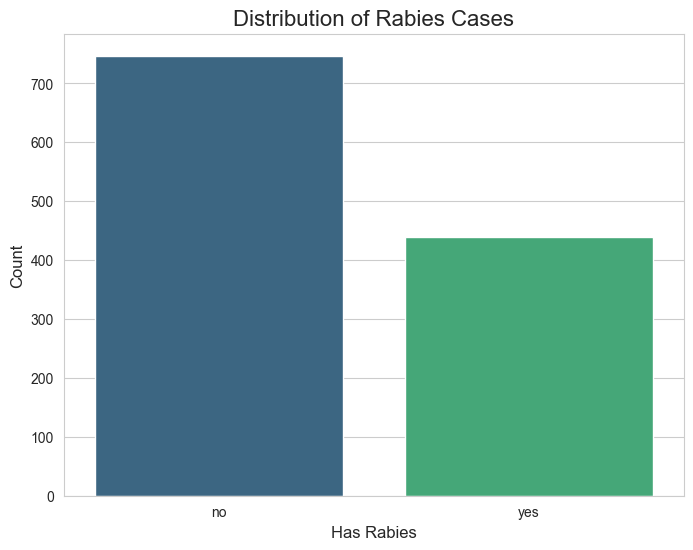

Rabies Variable Distribution:
rabies
no     747
yes    439
Name: count, dtype: int64


In [39]:
# Plot the distribution of the 'rabies' target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='rabies', data=df, palette='viridis')
plt.title('Distribution of Rabies Cases', fontsize=16)
plt.xlabel('Has Rabies', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Print the exact counts
print("Rabies Variable Distribution:")
print(df['rabies'].value_counts())

C:\Users\ywcha\AppData\Local\Temp\ipykernel_35224\2740005150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vaccinated', data=df, palette='pastel')


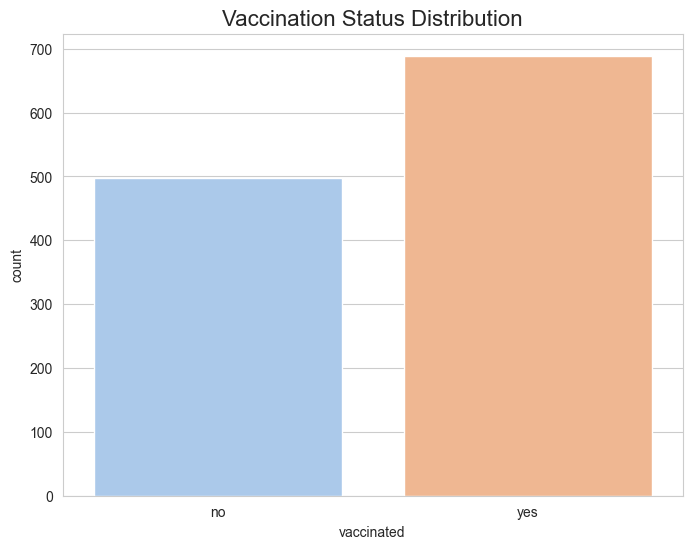

C:\Users\ywcha\AppData\Local\Temp\ipykernel_35224\2740005150.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='dog_breed', data=df, order=df['dog_breed'].value_counts().index, palette='magma')


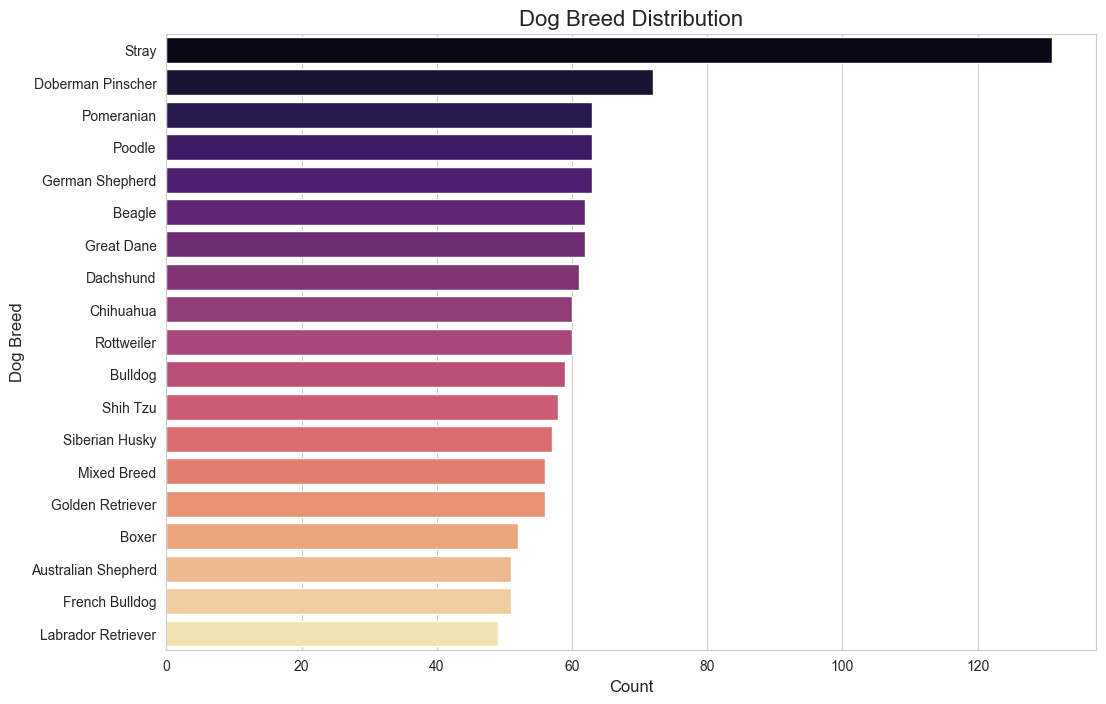

In [40]:
# Plotting distribution of 'vaccinated' status
plt.figure(figsize=(8, 6))
sns.countplot(x='vaccinated', data=df, palette='pastel')
plt.title('Vaccination Status Distribution', fontsize=16)
plt.show()

# Plotting distribution of 'dog_breed'
plt.figure(figsize=(12, 8))
sns.countplot(y='dog_breed', data=df, order=df['dog_breed'].value_counts().index, palette='magma')
plt.title('Dog Breed Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Dog Breed', fontsize=12)
plt.show()

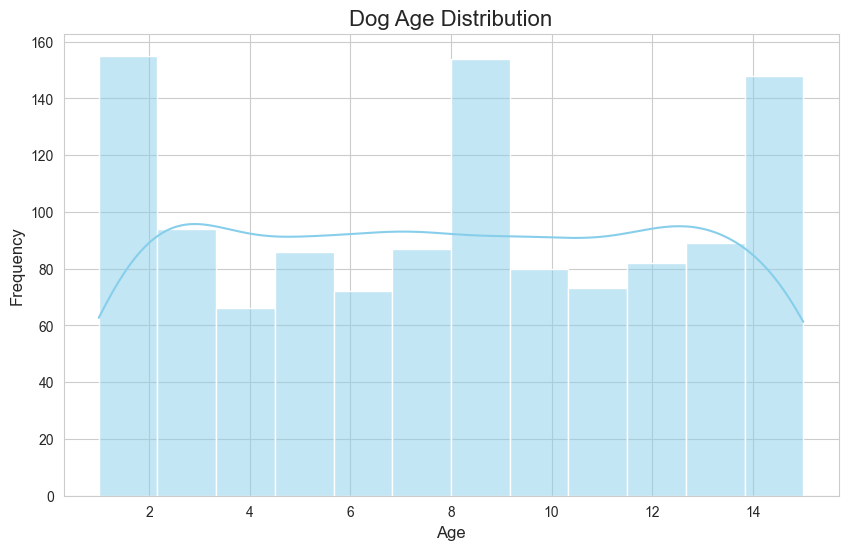

In [41]:
# Plotting the distribution of dog_age
plt.figure(figsize=(10, 6))
sns.histplot(df['dog_age'], bins=12, kde=True, color='skyblue')
plt.title('Dog Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

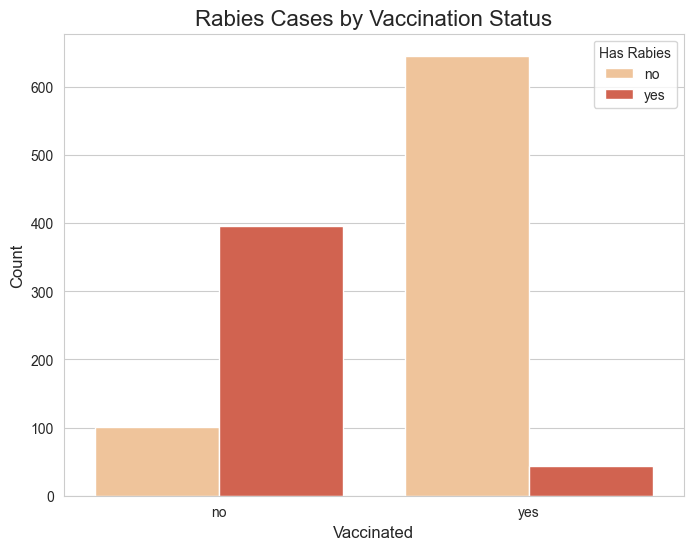

In [42]:
# How does vaccination status relate to rabies?
plt.figure(figsize=(8, 6))
sns.countplot(x='vaccinated', hue='rabies', data=df, palette='OrRd')
plt.title('Rabies Cases by Vaccination Status', fontsize=16)
plt.xlabel('Vaccinated', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Has Rabies')
plt.show()

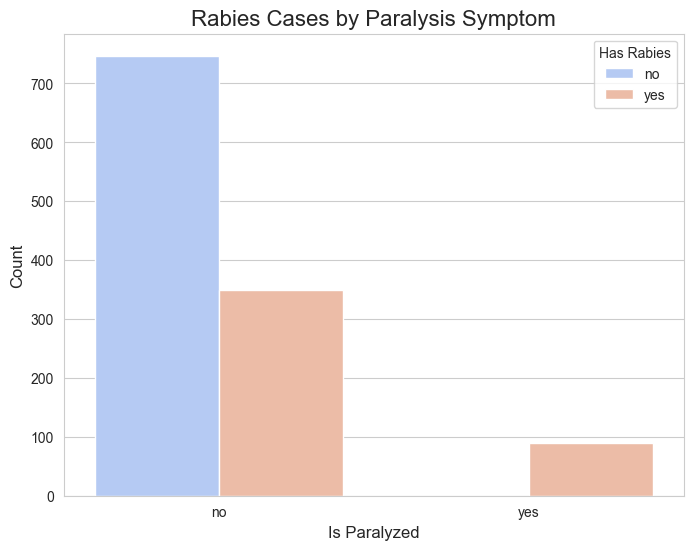

In [43]:
# How does the 'paralyzed' symptom relate to rabies?
plt.figure(figsize=(8, 6))
sns.countplot(x='hind_leg_paralysis', hue='rabies', data=df, palette='coolwarm')
plt.title('Rabies Cases by Paralysis Symptom', fontsize=16)
plt.xlabel('Is Paralyzed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Has Rabies')
plt.show()

C:\Users\ywcha\AppData\Local\Temp\ipykernel_35224\1515915462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rabies', y='dog_age', data=df, palette='winter')


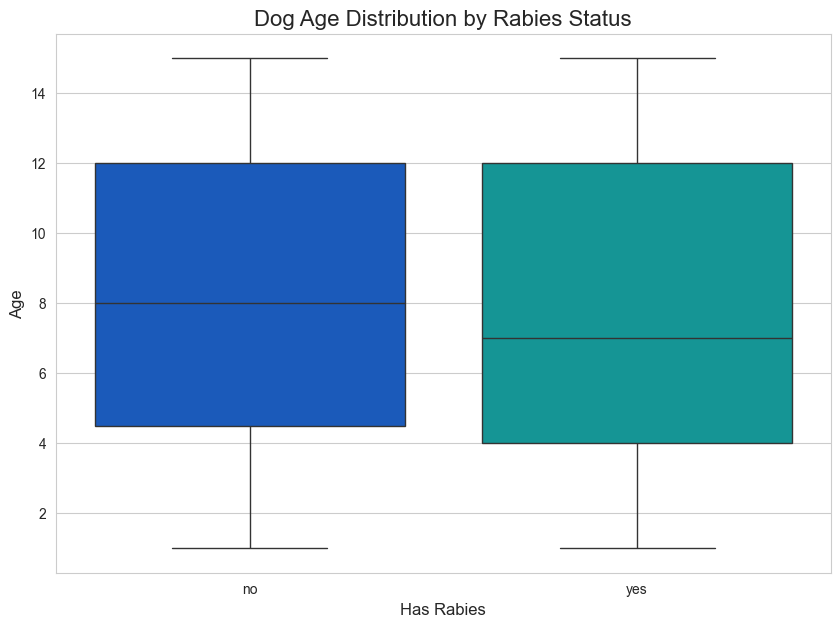

In [44]:
# How does dog age relate to rabies?
plt.figure(figsize=(10, 7))
sns.boxplot(x='rabies', y='dog_age', data=df, palette='winter')
plt.title('Dog Age Distribution by Rabies Status', fontsize=16)
plt.xlabel('Has Rabies', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

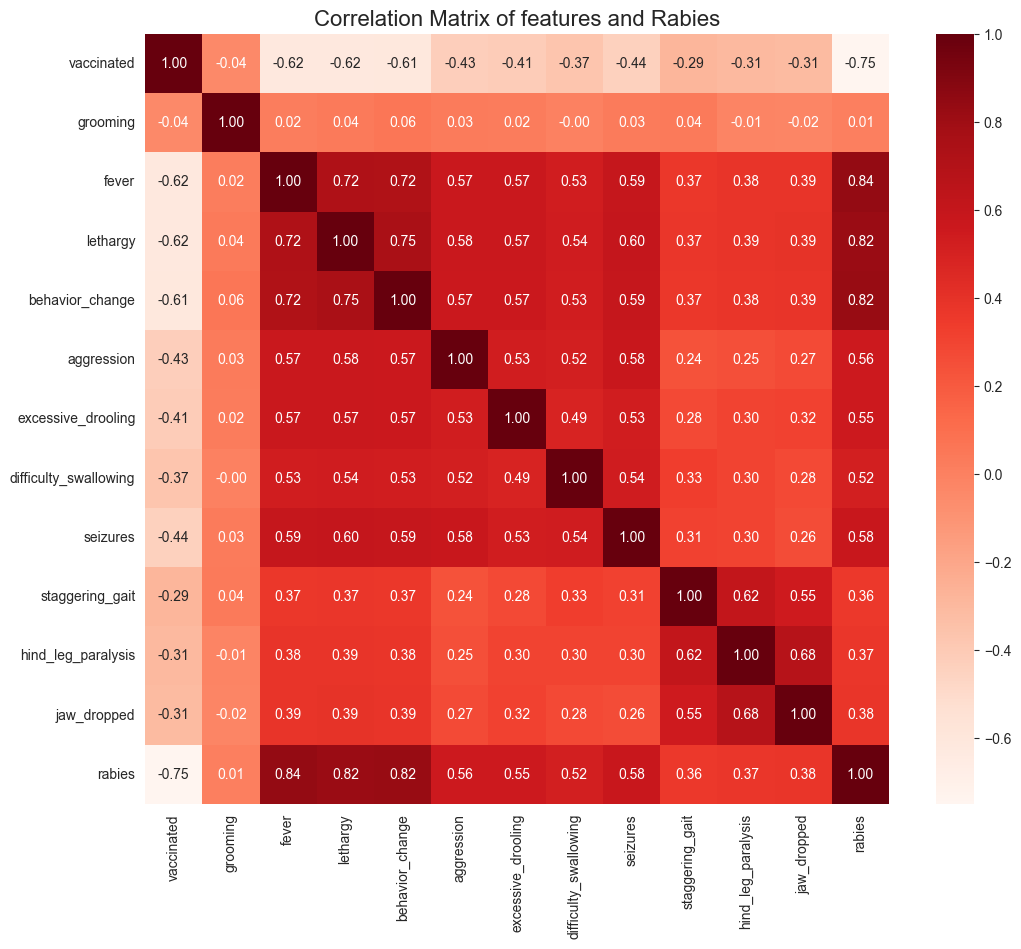

In [45]:
# dog_breed                
# dog_age                  
# vaccinated               
# grooming                 
# rabies                   
# fever                    
# lethargy                 
# behavior_change          
# aggression               
# excessive_drooling       
# difficulty_swallowing    
# seizures                 
# staggering_gait          
# hind_leg_paralysis       
# jaw_dropped              


# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Convert all 'yes'/'no' columns to 1/0
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        # Use a more robust check for yes/no values
        if all(val in ['yes', 'no'] for val in df_encoded[col].unique() if pd.notna(val)):
            df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

# We are interested in the correlation of symptoms with the 'rabies' column
symptom_cols = [
    'vaccinated', 'grooming', 'fever', 'lethargy',
    'behavior_change', 'aggression', 'excessive_drooling', 
    'difficulty_swallowing','seizures','staggering_gait',
    'hind_leg_paralysis','jaw_dropped', 'rabies'
]
corr_matrix = df_encoded[symptom_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix of features and Rabies', fontsize=16)
plt.show()